## **Heart Decease Dataset**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. This is a rather well-known,commo and simple dataset for experimentation.



## Dataset Attributes


1. age
2. sex
3. chest pain type (4 values)resting blood pressure
4. serum cholestoral in mg/dl
5. fasting blood sugar > 120 mg/dl
6. resting electrocardiographic results (values 0,1,2)
7. maximum heart rate achieved
8. exercise induced angina
9. oldpeak = ST depression induced by exercise relative to rest
10. the slope of the peak exercise ST segment
11. number of major vessels (0-3) colored by flourosopy
12. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

*The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.*

*from kaggle.com*



## Importing Data and Data Analysis

In [1]:
# Importing the required libraries for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [36]:
# Importing Data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [41]:
# Checking for Null Values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Aparently there are no null values in this dataset. However, this is not always the case and we could easily be in the need of ways to approach missing values in our dataset. Some approaches for such cases are :


1. Deleting Rows with missing values
2. Prediction of missing values
3. Impute missing values for continuous/categorical variable




In [42]:
# Extract Descriptive Data.
pd.set_option("display.float", "{:.2f}".format)
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [43]:
#Features Depiction Summary
categorical_val = []
continous_val = []
for column in df.columns:
    print('********************************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('********************************************')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

********************************************
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
********************************************
sex : [1 0]
********************************************
cp : [3 2 1 0]
********************************************
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
********************************************
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 22

1    207
0     96
Name: sex, dtype: int64


<Axes: title={'center': 'Heart Disease Cases Male Vs Female '}>

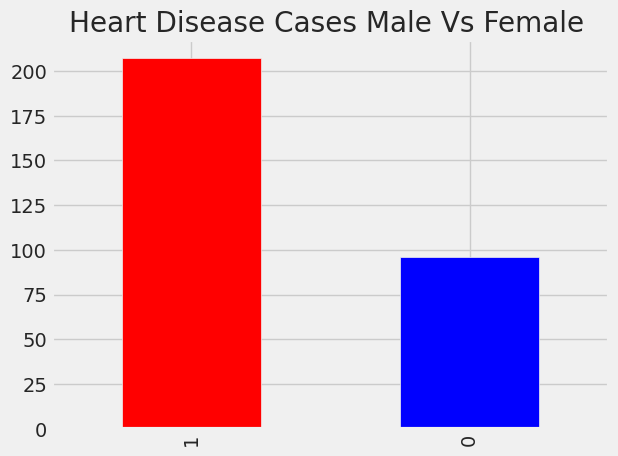

In [50]:
#Viewing some of the stats in the data set like Heart Desease cases Male VS Female:
print(df.sex.value_counts())
df.sex.value_counts().plot(kind="bar", color=["red", "blue"], title = 'Heart Disease Cases Male Vs Female ')

We can see that there is a higher occurence rate of  heart attacks in Males and a much less occurence rate for women

We can also alalize the relationship of continous and categorical afeatures and heart disease:

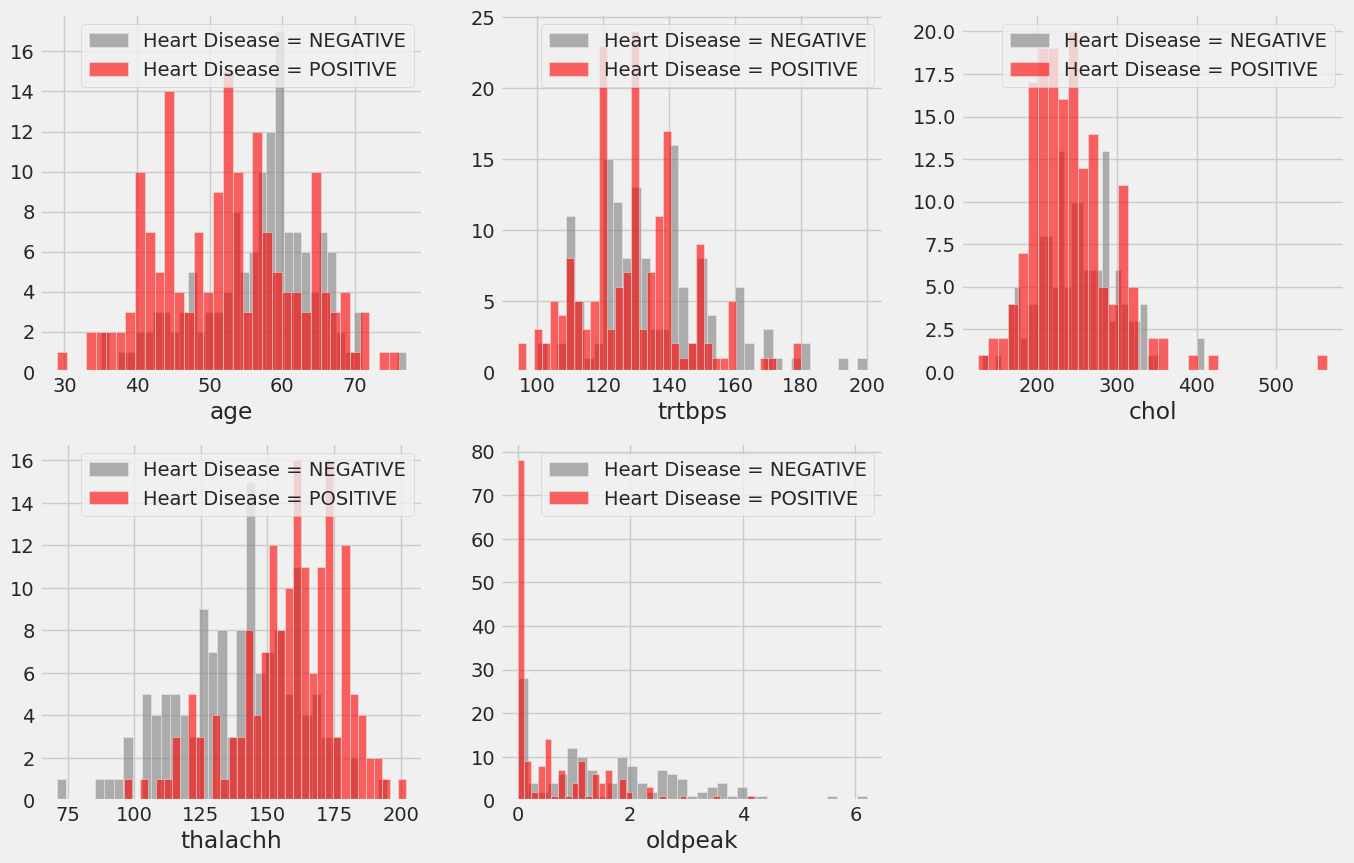

In [57]:
#continous
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["output"] == 0][column].hist(bins=35, color='gray', label='Heart Disease = NEGATIVE', alpha=0.6)
    df[df["output"] == 1][column].hist(bins=35, color='red', label='Heart Disease = POSITIVE', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

We can see for example in the graphs above that people with a heart rate above 140 (thalch graph) and  cholesterol higher than 200 (chol graph)  have a higher chance to suffer a heart disease, Furthermore we can see that people aged 40-60 (age graph)note a high heard decease occurance

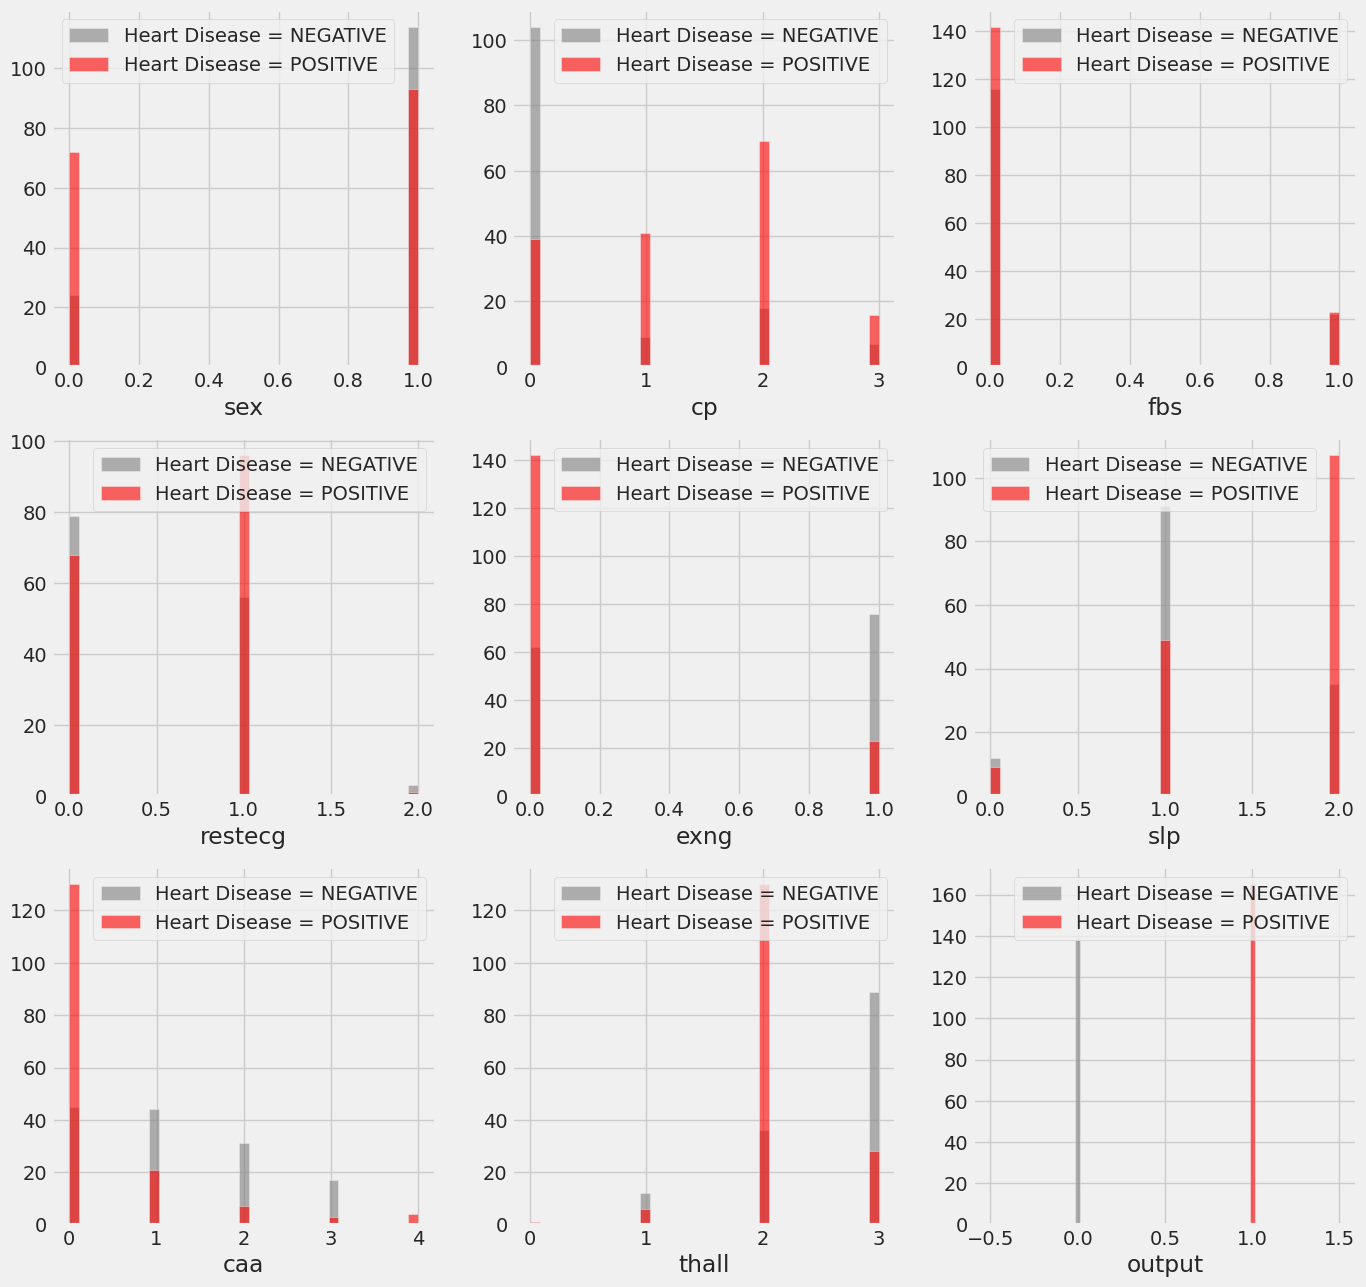

In [58]:
#Categorical
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["output"] == 0][column].hist(bins=35, color='gray', label='Heart Disease = NEGATIVE', alpha=0.6)
    df[df["output"] == 1][column].hist(bins=35, color='red', label='Heart Disease = POSITIVE', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

We can also see that individuals  with a vessel number equal to 0 (ca graph) and a thal value = 2 (thal graph) are more likely to suffer from a hear desease.

We can implement different classifiers so we can compare performances


##Logistic Regression (Standard , Lasso, Ridge )

In [103]:
from sklearn.linear_model import LogisticRegression
# Standard logistic regression
print('Standard Logistic Regression')
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report



Standard Logistic Regression


,0,1,accuracy,macro avg,weighted avg
precision,0.74,0.75,0.75,0.75,0.75
recall,0.68,0.80,0.75,0.74,0.75
f1-score,0.71,0.78,0.75,0.74,0.75
support,41.00,50.00,0.75,91.00,91.00


In [79]:
from sklearn.linear_model import LogisticRegressionCV
# L1 regularized logistic regression (Lasso)_
L1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = L1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.76,0.76,0.76,0.76,0.76
recall,0.68,0.82,0.76,0.75,0.76
f1-score,0.72,0.79,0.76,0.75,0.76
support,41.00,50.00,0.76,91.00,91.00


In [80]:
# L2 regularized logistic regression (Ridge Regression)
L2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = L2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.74,0.75,0.75,0.75,0.75
recall,0.68,0.80,0.75,0.74,0.75
f1-score,0.71,0.78,0.75,0.74,0.75
support,41.00,50.00,0.75,91.00,91.00


## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = RF.predict(X_test)

RF_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
RF_report

,0,1,accuracy,macro avg,weighted avg
precision,0.80,0.77,0.78,0.78,0.78
recall,0.68,0.86,0.78,0.77,0.78
f1-score,0.74,0.81,0.78,0.77,0.78
support,41.00,50.00,0.78,91.00,91.00


## KNN Classifier

In [90]:
#Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.63,0.66,0.65,0.64,0.65
recall,0.54,0.74,0.65,0.64,0.65
f1-score,0.58,0.70,0.65,0.64,0.64
support,41.00,50.00,0.65,91.00,91.00


## AdaBoostClassifier Classifier

In [96]:
#AdaBoostClassifier Classifier
from sklearn.ensemble import AdaBoostClassifier
ada =  AdaBoostClassifier(estimator=None, n_estimators=50).fit(X_train, y_train)
y_pred = ada.predict(X_test)

ada_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
ada_report

,0,1,accuracy,macro avg,weighted avg
precision,0.75,0.75,0.75,0.75,0.75
recall,0.66,0.82,0.75,0.74,0.75
f1-score,0.70,0.78,0.75,0.74,0.75
support,41.00,50.00,0.75,91.00,91.00


All the models performed well. However,as we can see from the experiments above, the **Random Forest Classifier** was the higest performing one for our case. Choosing the right classifier always depends on each case